Accuracy with default (10 trees): 1.0000


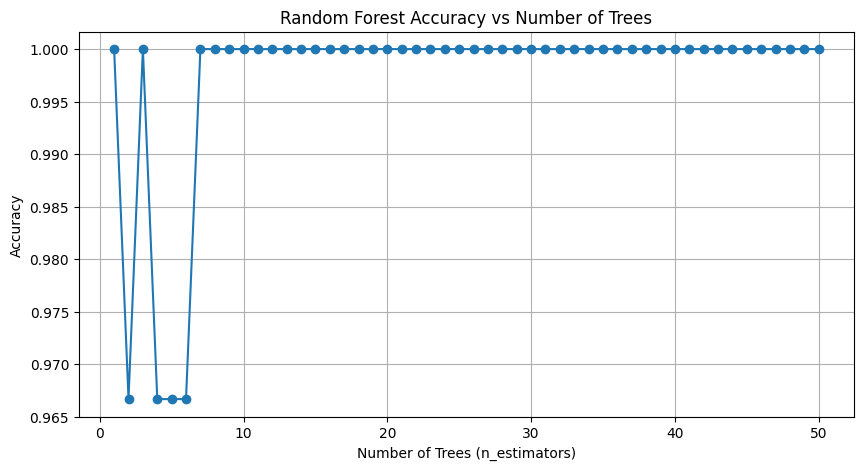

Best Accuracy = 1.0000 with n_estimators = 1


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("iris.csv")

# Features and target
X = df.drop(columns=["species"])
y = df["species"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train with default n_estimators = 10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with default (10 trees): {default_score:.4f}")

# 2. Fine-tune n_estimators
scores = []
tree_range = range(1, 51)

for n in tree_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plotting results
plt.figure(figsize=(10,5))
plt.plot(tree_range, scores, marker='o')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best result
best_score = max(scores)
best_n = tree_range[scores.index(best_score)]

print(f"Best Accuracy = {best_score:.4f} with n_estimators = {best_n}")
